# Analyze the measurement range of DWEL scans

## NSF DWEL scans, 20150919

In [1]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
sns.set_context('poster')
sns.set_style('whitegrid')

In [3]:
dpi = 300
outfigdir = '../figures'

In [4]:
# names of point files
nir_pts_files = [ \
                 "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-C/HFHD_20150919_C_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                 "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-E/HFHD_20150919_E_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                 "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-N/HFHD_20150919_N_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                 "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-S/HFHD_20150919_S_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                 "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-W/HFHD_20150919_W_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt" \
                ]

swir_pts_files = [ \
                  "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-C/HFHD_20150919_C_1548_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                  "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-E/HFHD_20150919_E_1548_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                  "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-N/HFHD_20150919_N_1548_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                  "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-S/HFHD_20150919_S_1548_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                  "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-W/HFHD_20150919_W_1548_cube_bsfix_pxc_update_atp2_ptcl_points.txt" \
                 ]

In [5]:
def read_points(pts_file):
    pts = np.genfromtxt(pts_file, delimiter=',', skip_header=3, usecols=(0,1,2,3,8))
    return pts

In [6]:
def get_range_hist(pts, bins=np.arange(0, 100, 0.5)):
    inpts_flag = pts[:, 4] != 0
    hist, bin_edges = np.histogram(pts[inpts_flag, 4], bins=bins)
    return hist, (bin_edges[:-1]+bin_edges[1:])*0.5

## Plot histograms of range values at NIR and SWIR
### Year 2015

In [7]:
bins = np.arange(0, 100, 0.5)
swir_hists_2015 = pd.DataFrame(data=np.zeros((len(bins)-1, len(swir_pts_files)+1), dtype=np.float), columns=['bin_center', 'C', 'E', 'N', 'S', 'W'])
nir_hists_2015 = pd.DataFrame(data=np.zeros((len(bins)-1, len(nir_pts_files)+1), dtype=np.float), columns=['bin_center', 'C', 'E', 'N', 'S', 'W'])
for n, (fname_nir, fname_swir) in enumerate(zip(nir_pts_files, swir_pts_files)):
    swir_hists_2015.iloc[:, n+1], bin_center = get_range_hist(read_points(fname_swir), bins=bins)
    nir_hists_2015.iloc[:, n+1], bin_center = get_range_hist(read_points(fname_nir), bins=bins)

swir_hists_2015.iloc[:, 0] = bin_center
nir_hists_2015.iloc[:, 0] = bin_center

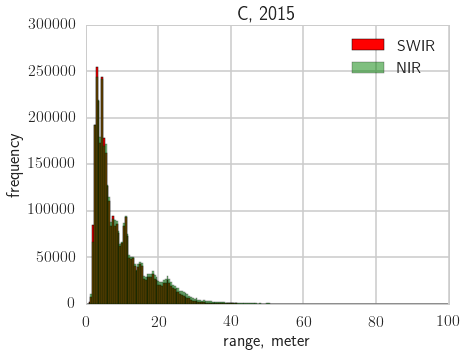

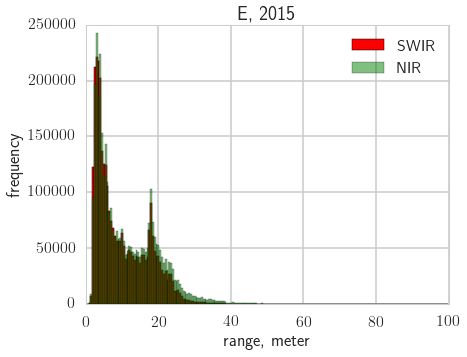

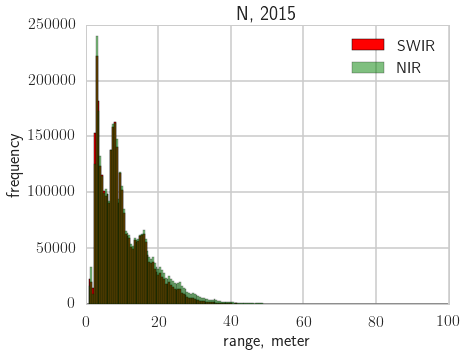

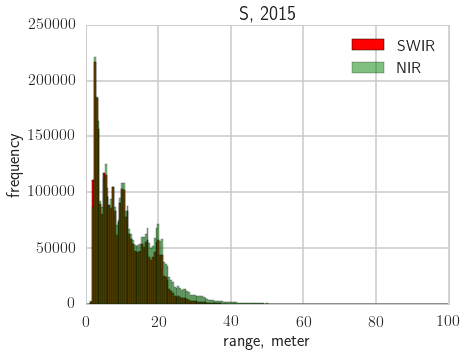

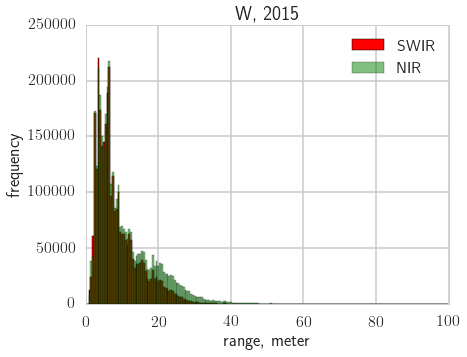

In [8]:
for n, plot_name in enumerate(nir_hists_2015.columns.values[1:]):
    fig, ax = plt.subplots(figsize=(6.5, 5))
    bar_width = nir_hists_2015.iloc[1, 0] - nir_hists_2015.iloc[0, 0]
    ax.bar(nir_hists_2015.iloc[:, 0], swir_hists_2015.iloc[:, n+1], color='red', width=bar_width, label='SWIR')
    ax.bar(nir_hists_2015.iloc[:, 0], nir_hists_2015.iloc[:, n+1], color='green', width=bar_width, alpha=0.5, label='NIR')
    ax.set_title('{0:s}, 2015'.format(plot_name))
    ax.set_xlabel('range, meter')
    ax.set_ylabel('frequency')
    ax.legend()
    plt.savefig('{0:s}/range_hist_nir_vs_swir_2015_{1:s}.png'.format(outfigdir, plot_name), \
                dpi=dpi, bbox_inches='tight', pad_inches=0.)

## Plot histograms of range values at NIR and SWIR
### Year 2014

In [9]:
nir_pts_files_2014 = [ \
                      "/projectnb/echidna/lidar/DWEL_Processing/HF2014/Hardwood20140919/HFHD_20140919_C/HFHD_20140919_C_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                      "/projectnb/echidna/lidar/DWEL_Processing/HF2014/Hardwood20140919/HFHD_20140919_E/HFHD_20140919_E_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                      "/projectnb/echidna/lidar/DWEL_Processing/HF2014/Hardwood20140919/HFHD_20140919_N/HFHD_20140919_N_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                      "/projectnb/echidna/lidar/DWEL_Processing/HF2014/Hardwood20140919/HFHD_20140919_S/HFHD_20140919_S_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                      "/projectnb/echidna/lidar/DWEL_Processing/HF2014/Hardwood20140919/HFHD_20140919_W/HFHD_20140919_W_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt"
                     ]
swir_pts_files_2014 = [ \
                      "/projectnb/echidna/lidar/DWEL_Processing/HF2014/Hardwood20140919/HFHD_20140919_C/HFHD_20140919_C_1548_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                      "/projectnb/echidna/lidar/DWEL_Processing/HF2014/Hardwood20140919/HFHD_20140919_E/HFHD_20140919_E_1548_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                      "/projectnb/echidna/lidar/DWEL_Processing/HF2014/Hardwood20140919/HFHD_20140919_N/HFHD_20140919_N_1548_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                      "/projectnb/echidna/lidar/DWEL_Processing/HF2014/Hardwood20140919/HFHD_20140919_S/HFHD_20140919_S_1548_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                      "/projectnb/echidna/lidar/DWEL_Processing/HF2014/Hardwood20140919/HFHD_20140919_W/HFHD_20140919_W_1548_cube_bsfix_pxc_update_atp2_ptcl_points.txt"
                     ]

In [10]:
bins = np.arange(0, 100, 0.5)
swir_hists_2014 = pd.DataFrame(data=np.zeros((len(bins)-1, len(swir_pts_files_2014)+1), dtype=np.float), columns=['bin_center', 'C', 'E', 'N', 'S', 'W'])
nir_hists_2014 = pd.DataFrame(data=np.zeros((len(bins)-1, len(nir_pts_files_2014)+1), dtype=np.float), columns=['bin_center', 'C', 'E', 'N', 'S', 'W'])
for n, (fname_nir, fname_swir) in enumerate(zip(nir_pts_files_2014, swir_pts_files_2014)):
    swir_hists_2014.iloc[:, n+1], bin_center = get_range_hist(read_points(fname_swir), bins=bins)
    nir_hists_2014.iloc[:, n+1], bin_center = get_range_hist(read_points(fname_nir), bins=bins)

swir_hists_2014.iloc[:, 0] = bin_center
nir_hists_2014.iloc[:, 0] = bin_center

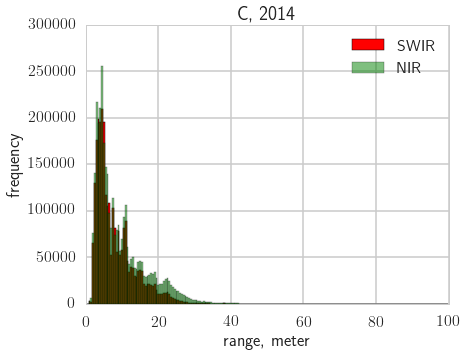

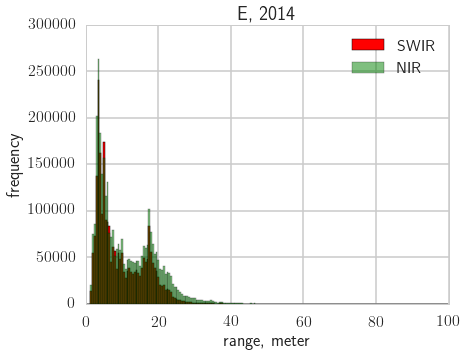

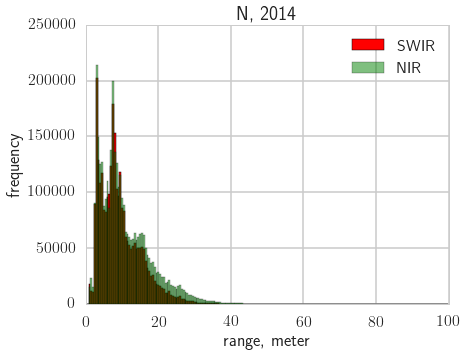

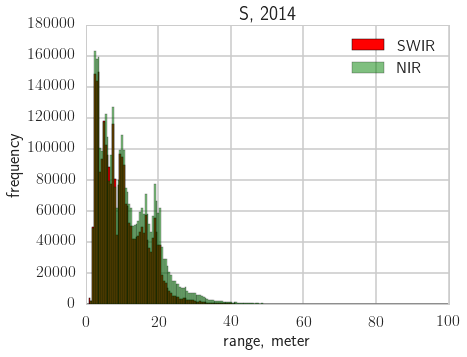

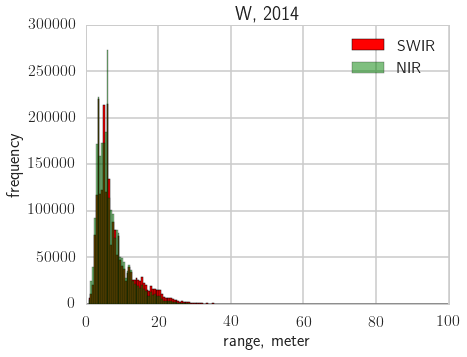

In [11]:
for n, plot_name in enumerate(nir_hists_2014.columns.values[1:]):
    fig, ax = plt.subplots(figsize=(6.5, 5))
    bar_width = nir_hists_2014.iloc[1, 0] - nir_hists_2014.iloc[0, 0]
    ax.bar(nir_hists_2014.iloc[:, 0], swir_hists_2014.iloc[:, n+1], color='red', width=bar_width, label='SWIR')
    ax.bar(nir_hists_2014.iloc[:, 0], nir_hists_2014.iloc[:, n+1], color='green', width=bar_width, alpha=0.5, label='NIR')
    ax.set_title('{0:s}, 2014'.format(plot_name))
    ax.set_xlabel('range, meter')
    ax.set_ylabel('frequency')
    ax.legend()
    plt.savefig('{0:s}/range_hist_nir_vs_swir_2014_{1:s}.png'.format(outfigdir, plot_name), \
                dpi=dpi, bbox_inches='tight', pad_inches=0.)

## Plot the histograms of range values for 2014 and 2015 together
### SWIR band

In [12]:
wavelength = 1548

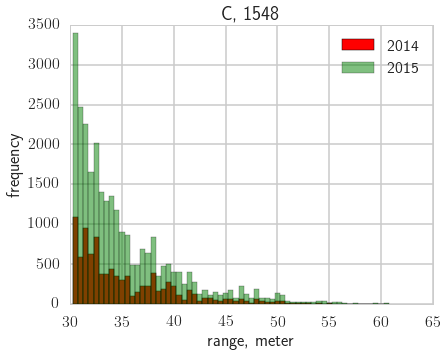

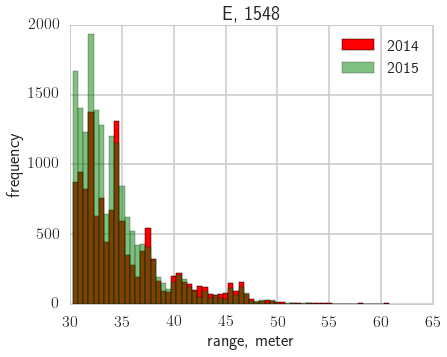

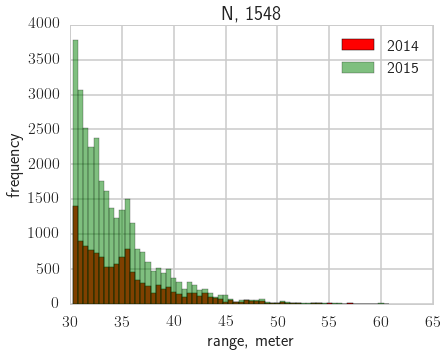

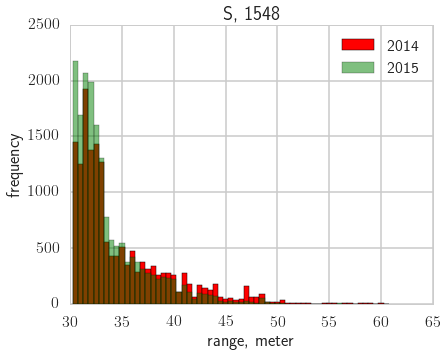

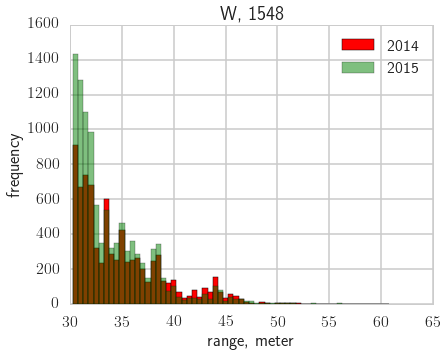

In [13]:
for plot_name in ('C', 'E', 'N', 'S', 'W'):
    fig, ax = plt.subplots(figsize=(6.5, 5))
    tmpind = np.where(swir_hists_2014.loc[:, 'bin_center'] >= 30)[0]
    tmpind = tmpind[0]
    rg_diff = 30
    rg_res = swir_hists_2014.loc[1, 'bin_center'] - swir_hists_2014.loc[0, 'bin_center']
    ax.bar(swir_hists_2014.loc[tmpind:tmpind+np.fix(rg_diff/rg_res), 'bin_center'], \
           swir_hists_2014.loc[tmpind:tmpind+np.fix(rg_diff/rg_res), plot_name], \
           color='red', width=rg_res)
    
    tmpind = np.where(swir_hists_2015.loc[:, 'bin_center'] >= 30)[0]
    tmpind = tmpind[0]
    rg_diff = 30
    rg_res = swir_hists_2015.loc[1, 'bin_center'] - swir_hists_2015.loc[0, 'bin_center']
    ax.bar(swir_hists_2015.loc[tmpind:tmpind+np.fix(rg_diff/rg_res), 'bin_center'], \
           swir_hists_2015.loc[tmpind:tmpind+np.fix(rg_diff/rg_res), plot_name], \
           color='green', alpha=0.5, width=rg_res)
    ax.set_title('{0:s}, {1:d}'.format(plot_name, wavelength))
    ax.set_xlabel('range, meter')
    ax.set_ylabel('frequency')
    ax.legend(['2014', '2015'])
    plt.savefig('../figures/range_hist_2014_vs_2015_{0:d}_zoom_in_30_to_60_{1:s}.png'.format(wavelength, plot_name), \
                dpi=dpi, bbox_inches='tight', pad_inches=0.)

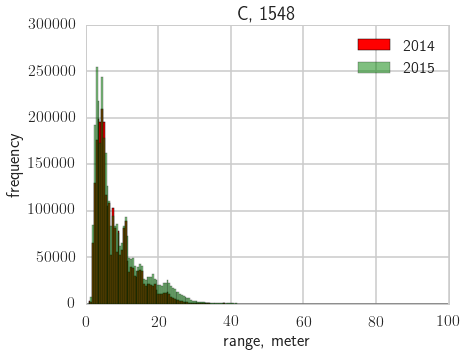

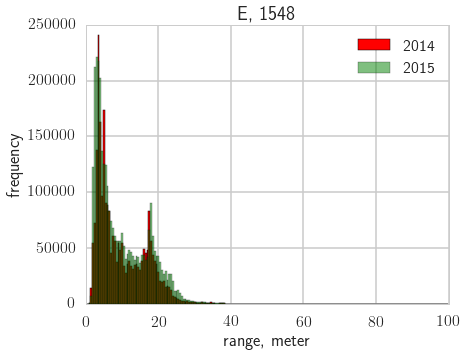

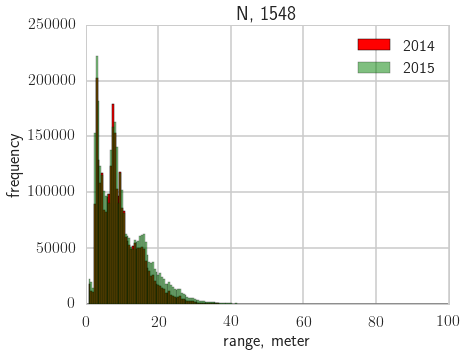

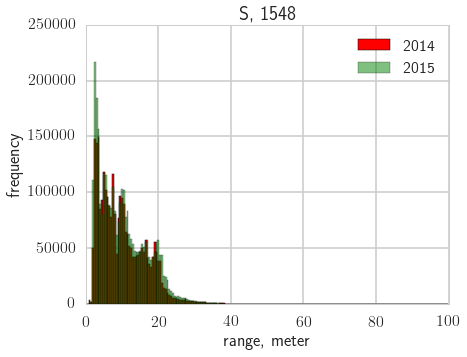

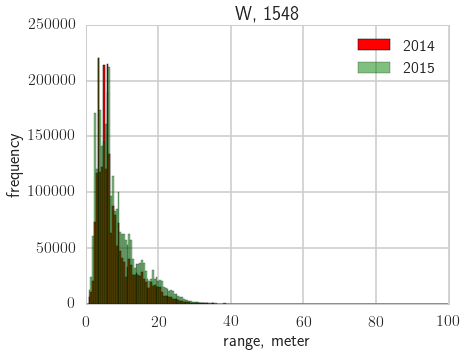

In [14]:
for plot_name in ('C', 'E', 'N', 'S', 'W'):
    fig, ax = plt.subplots(figsize=(6.5, 5))
    tmpind = 0
    rg_res = swir_hists_2014.loc[1, 'bin_center'] - swir_hists_2014.loc[0, 'bin_center']
    ax.bar(swir_hists_2014.loc[tmpind:, 'bin_center'],\
           swir_hists_2014.loc[tmpind:, plot_name], \
           color='red', width=rg_res)
    ax.bar(swir_hists_2015.loc[tmpind:, 'bin_center'], \
           swir_hists_2015.loc[tmpind:, plot_name], \
           color='green', alpha=0.5, width=rg_res)
    ax.set_title('{0:s}, {1:d}'.format(plot_name, wavelength))
    ax.set_xlabel('range, meter')
    ax.set_ylabel('frequency')
    ax.legend(['2014', '2015'])
    plt.savefig('../figures/range_hist_2014_vs_2015_{0:d}_{1:s}.png'.format(wavelength, plot_name), dpi=dpi, bbox_inches='tight', pad_inches=0.)

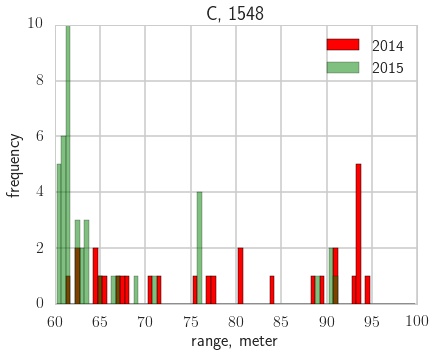

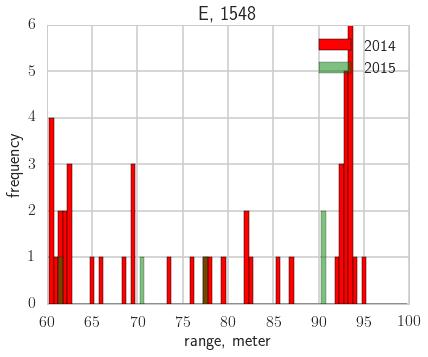

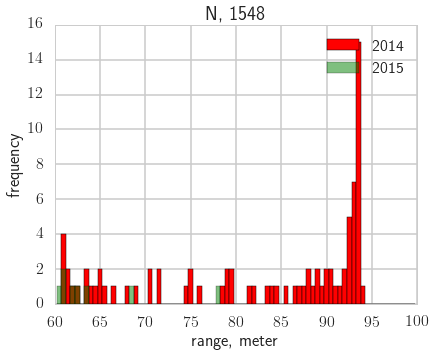

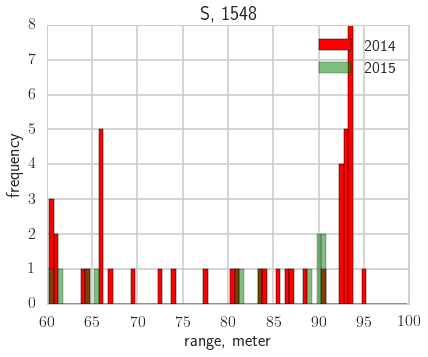

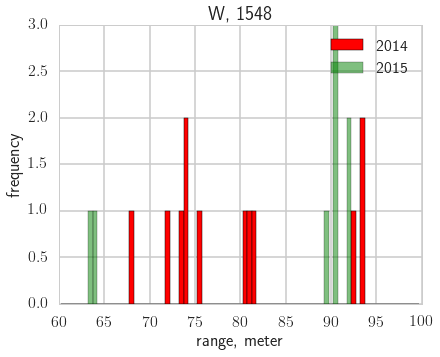

In [15]:
for plot_name in ('C', 'E', 'N', 'S', 'W'):
    fig, ax = plt.subplots(figsize=(6.5, 5))
    tmpind = np.where(swir_hists_2014.loc[:, 'bin_center'] >= 60)[0]
    tmpind = tmpind[0]
    rg_res = swir_hists_2014.loc[1, 'bin_center'] - swir_hists_2014.loc[0, 'bin_center']
    ax.bar(swir_hists_2014.loc[tmpind:, 'bin_center'], \
           swir_hists_2014.loc[tmpind:, plot_name], \
           color='red', width=rg_res)
    ax.bar(swir_hists_2015.loc[tmpind:, 'bin_center'], \
           swir_hists_2015.loc[tmpind:, plot_name], \
           color='green', alpha=0.5, width=rg_res)
    ax.set_title('{0:s}, {1:d}'.format(plot_name, wavelength))
    ax.set_xlabel('range, meter')
    ax.set_ylabel('frequency')
    ax.legend(['2014', '2015'])
    plt.savefig('../figures/range_hist_2014_vs_2015_{0:d}_zoom_in_beyond_60_{1:s}.png'.format(wavelength, plot_name), dpi=dpi, bbox_inches='tight', pad_inches=0.)

## Plot the histograms of range values for 2014 and 2015 together
### NIR band

In [16]:
wavelength = 1064

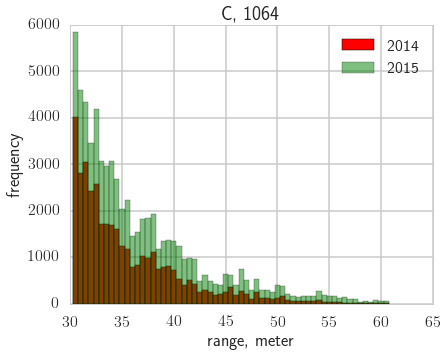

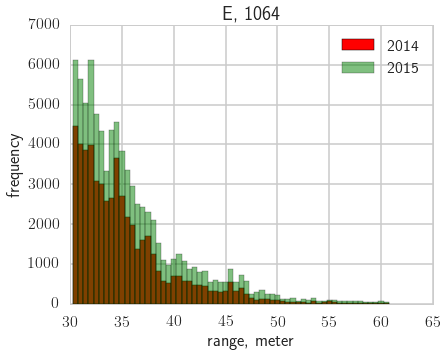

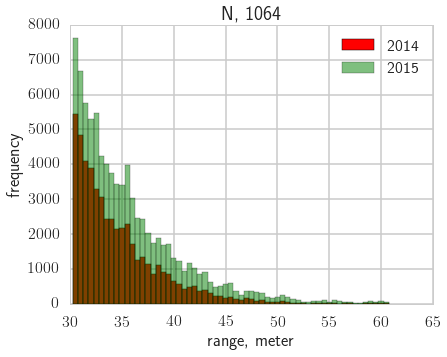

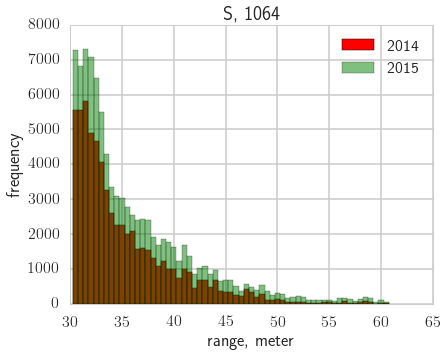

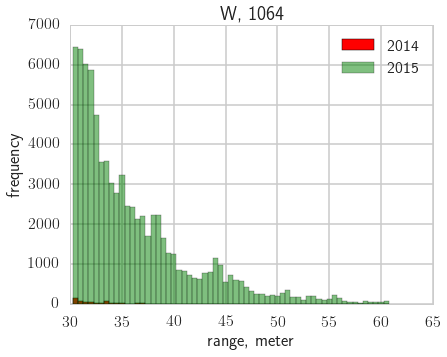

In [17]:
for plot_name in ('C', 'E', 'N', 'S', 'W'):
    fig, ax = plt.subplots(figsize=(6.5, 5))
    tmpind = np.where(nir_hists_2014.loc[:, 'bin_center'] >= 30)[0]
    tmpind = tmpind[0]
    rg_diff = 30
    rg_res = nir_hists_2014.loc[1, 'bin_center'] - nir_hists_2014.loc[0, 'bin_center']
    ax.bar(nir_hists_2014.loc[tmpind:tmpind+np.fix(rg_diff/rg_res), 'bin_center'], \
           nir_hists_2014.loc[tmpind:tmpind+np.fix(rg_diff/rg_res), plot_name], \
           color='red', width=rg_res)
    
    tmpind = np.where(nir_hists_2015.loc[:, 'bin_center'] >= 30)[0]
    tmpind = tmpind[0]
    rg_diff = 30
    rg_res = nir_hists_2015.loc[1, 'bin_center'] - nir_hists_2015.loc[0, 'bin_center']
    ax.bar(nir_hists_2015.loc[tmpind:tmpind+np.fix(rg_diff/rg_res), 'bin_center'], \
           nir_hists_2015.loc[tmpind:tmpind+np.fix(rg_diff/rg_res), plot_name], \
           color='green', alpha=0.5, width=rg_res)
    ax.set_title('{0:s}, {1:d}'.format(plot_name, wavelength))
    ax.set_xlabel('range, meter')
    ax.set_ylabel('frequency')
    ax.legend(['2014', '2015'])
    plt.savefig('../figures/range_hist_2014_vs_2015_{0:d}_zoom_in_30_to_60_{1:s}.png'.format(wavelength, plot_name), dpi=dpi, bbox_inches='tight', pad_inches=0.)

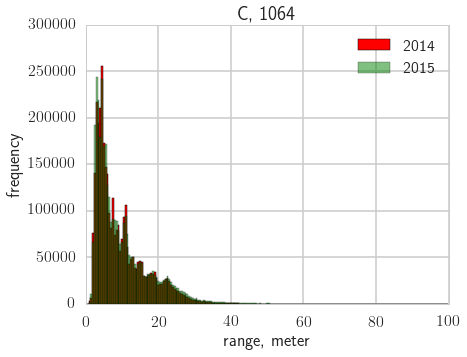

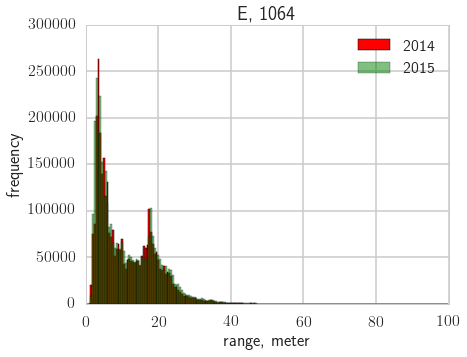

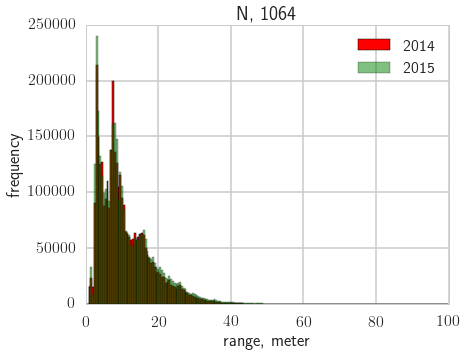

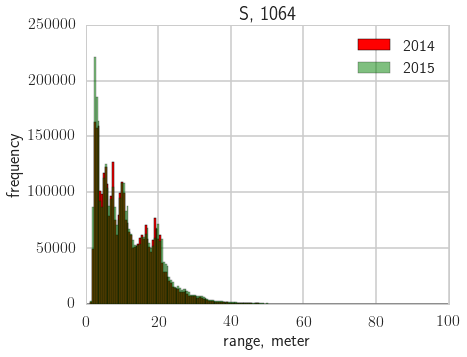

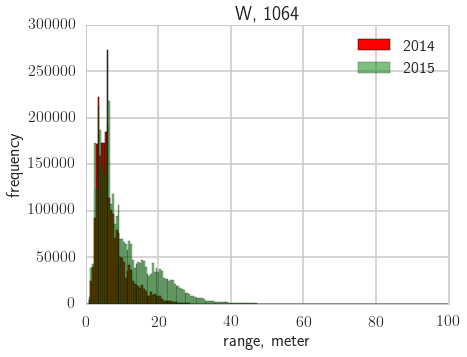

In [18]:
for plot_name in ('C', 'E', 'N', 'S', 'W'):
    fig, ax = plt.subplots(figsize=(6.5, 5))
    tmpind = 0
    rg_res = nir_hists_2014.loc[1, 'bin_center'] - nir_hists_2014.loc[0, 'bin_center']
    ax.bar(nir_hists_2014.loc[tmpind:, 'bin_center'],\
           nir_hists_2014.loc[tmpind:, plot_name], \
           color='red', width=rg_res)
    ax.bar(nir_hists_2015.loc[tmpind:, 'bin_center'], \
           nir_hists_2015.loc[tmpind:, plot_name], \
           color='green', alpha=0.5, width=rg_res)
    ax.set_title('{0:s}, {1:d}'.format(plot_name, wavelength))
    ax.set_xlabel('range, meter')
    ax.set_ylabel('frequency')
    ax.legend(['2014', '2015'])
    plt.savefig('../figures/range_hist_2014_vs_2015_{0:d}_{1:s}.png'.format(wavelength, plot_name), dpi=dpi, bbox_inches='tight', pad_inches=0.)

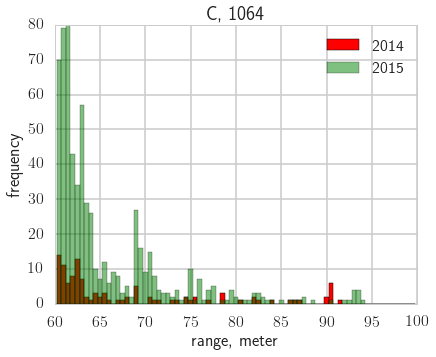

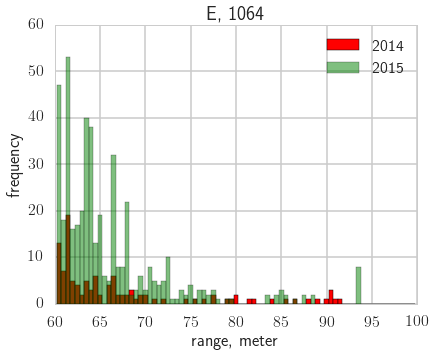

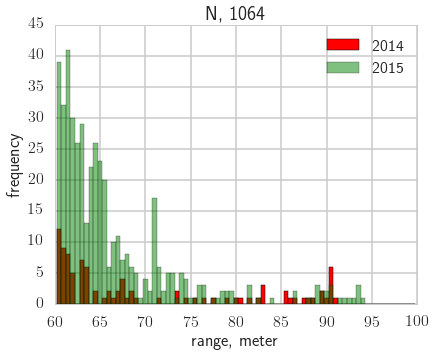

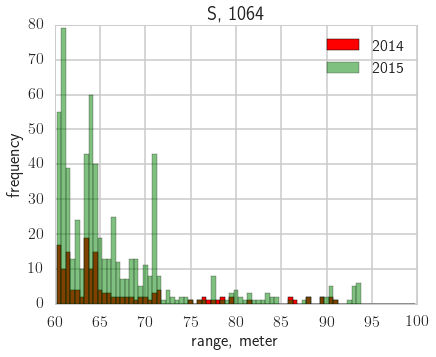

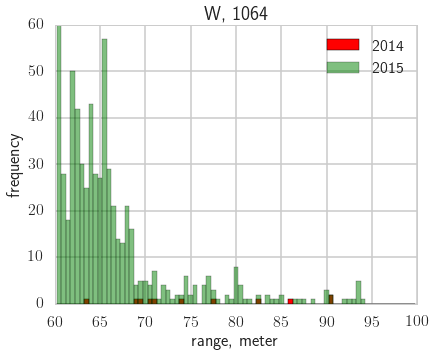

In [19]:
for plot_name in ('C', 'E', 'N', 'S', 'W'):
    fig, ax = plt.subplots(figsize=(6.5, 5))
    tmpind = np.where(nir_hists_2014.loc[:, 'bin_center'] >= 60)[0]
    tmpind = tmpind[0]
    rg_res = nir_hists_2014.loc[1, 'bin_center'] - nir_hists_2014.loc[0, 'bin_center']
    ax.bar(nir_hists_2014.loc[tmpind:, 'bin_center'], \
           nir_hists_2014.loc[tmpind:, plot_name], \
           color='red', width=rg_res)
    ax.bar(nir_hists_2015.loc[tmpind:, 'bin_center'], \
           nir_hists_2015.loc[tmpind:, plot_name], \
           color='green', alpha=0.5, width=rg_res)
    ax.set_title('{0:s}, {1:d}'.format(plot_name, wavelength))
    ax.set_xlabel('range, meter')
    ax.set_ylabel('frequency')
    ax.legend(['2014', '2015'])
    plt.savefig('../figures/range_hist_2014_vs_2015_{0:d}_zoom_in_beyond_60_{1:s}.png'.format(wavelength, plot_name), dpi=dpi, bbox_inches='tight', pad_inches=0.)

# Some simple stats

In [30]:
rg_break = [30, 60]
rg_lb = [0] + rg_break
rg_ub = rg_break + [swir_hists_2014.loc[:, 'bin_center'].max()]

In [38]:
swir_pts_cnt_stats_2014 = pd.DataFrame(np.zeros((len(rg_lb), 5)), columns=('C', 'E', 'N', 'S', 'W'))
swir_pts_cnt_stats_2015 = pd.DataFrame(np.zeros((len(rg_lb), 5)), columns=('C', 'E', 'N', 'S', 'W'))
nir_pts_cnt_stats_2014 = pd.DataFrame(np.zeros((len(rg_lb), 5)), columns=('C', 'E', 'N', 'S', 'W'))
nir_pts_cnt_stats_2015 = pd.DataFrame(np.zeros((len(rg_lb), 5)), columns=('C', 'E', 'N', 'S', 'W'))
for i in range(len(rg_lb)):
    tmpind = np.where(np.logical_and(swir_hists_2014.loc[:, 'bin_center']>=rg_lb[i],  
                       swir_hists_2014.loc[:, 'bin_center']<rg_ub[i]))[0]
    swir_pts_cnt_stats_2014.iloc[i, :] = swir_hists_2014.iloc[tmpind, 1:].sum()
    tmpind = np.where(np.logical_and(swir_hists_2015.loc[:, 'bin_center']>=rg_lb[i],  
                       swir_hists_2015.loc[:, 'bin_center']<rg_ub[i]))[0]
    swir_pts_cnt_stats_2015.iloc[i, :] = swir_hists_2015.iloc[tmpind, 1:].sum()
    
    tmpind = np.where(np.logical_and(nir_hists_2014.loc[:, 'bin_center']>=rg_lb[i],  
                       nir_hists_2014.loc[:, 'bin_center']<rg_ub[i]))[0]
    nir_pts_cnt_stats_2014.iloc[i, :] = nir_hists_2014.iloc[tmpind, 1:].sum()
    tmpind = np.where(np.logical_and(nir_hists_2015.loc[:, 'bin_center']>=rg_lb[i],  
                       nir_hists_2015.loc[:, 'bin_center']<rg_ub[i]))[0]
    nir_pts_cnt_stats_2015.iloc[i, :] = nir_hists_2015.iloc[tmpind, 1:].sum()

In [48]:
print swir_pts_cnt_stats_2014
print swir_pts_cnt_stats_2015
print swir_pts_cnt_stats_2014.sum()
print swir_pts_cnt_stats_2015.sum()
print (swir_pts_cnt_stats_2015.sum() - swir_pts_cnt_stats_2014.sum()) / swir_pts_cnt_stats_2015.sum()
print (swir_pts_cnt_stats_2015.sum().describe() - swir_pts_cnt_stats_2014.sum().describe()) / swir_pts_cnt_stats_2015.sum().describe()

print (swir_pts_cnt_stats_2015 - swir_pts_cnt_stats_2014) / swir_pts_cnt_stats_2014
print (swir_pts_cnt_stats_2015.T.describe() - swir_pts_cnt_stats_2014.T.describe()) / swir_pts_cnt_stats_2014.T.describe()

         C        E        N        S        W
0  2764694  2540537  2907011  2801844  2386973
1     9459    12856    12262    15873     7971
2       29       45       82       44       12
         C        E        N        S        W
0  3414038  3244915  3428747  3236210  3154655
1    27383    17511    31001    17191    10314
2       42        5        8       12        8
C    2774182
E    2553438
N    2919355
S    2817761
W    2394956
dtype: float64
C    3441463
E    3262431
N    3459756
S    3253413
W    3164977
dtype: float64
C    0.193895
E    0.217320
N    0.156196
S    0.133906
W    0.243294
dtype: float64
count    0.000000
mean     0.188297
std     -0.659193
min      0.243294
25%      0.215151
50%      0.149658
75%      0.181232
max      0.156196
dtype: float64
          C         E         N         S         W
0  0.234870  0.277256  0.179475  0.155029  0.321613
1  1.894915  0.362088  1.528217  0.083034  0.293941
2  0.448276 -0.888889 -0.902439 -0.727273 -0.333333
            

In [49]:
print nir_pts_cnt_stats_2014
print nir_pts_cnt_stats_2015
print nir_pts_cnt_stats_2014.sum()
print nir_pts_cnt_stats_2015.sum()
print (nir_pts_cnt_stats_2015.sum() - nir_pts_cnt_stats_2014.sum()) / nir_pts_cnt_stats_2015.sum()
print (nir_pts_cnt_stats_2015.sum().describe() - nir_pts_cnt_stats_2014.sum().describe()) / nir_pts_cnt_stats_2015.sum().describe()

print (nir_pts_cnt_stats_2015 - nir_pts_cnt_stats_2014) / nir_pts_cnt_stats_2014
print (nir_pts_cnt_stats_2015.T.describe() - nir_pts_cnt_stats_2014.T.describe()) / nir_pts_cnt_stats_2014.T.describe()

         C        E        N        S        W
0  3395782  3370615  3412293  3402803  2598828
1    38132    54199    51254    65136      525
2      112      114       95      151       11
         C        E        N        S        W
0  3547788  3568523  3608322  3615884  3616432
1    66890    82533    85303    93450    79426
2      642      456      450      634      629
C    3434026
E    3424928
N    3463642
S    3468090
W    2599364
dtype: float64
C    3615320
E    3651512
N    3694075
S    3709968
W    3696487
dtype: float64
C    0.050146
E    0.062052
N    0.062379
S    0.065197
W    0.296802
dtype: float64
count    0.000000
mean     0.107654
std     -8.686746
min      0.281014
25%      0.062052
50%      0.070396
75%      0.062991
max      0.065197
dtype: float64
          C         E         N         S           W
0  0.044763  0.058716  0.057448  0.062619    0.391563
1  0.754170  0.522777  0.664319  0.434690  150.287619
2  4.732143  3.000000  3.736842  3.198675   56.181818
    